Tne goal here is to take the data that I gathered in part 1 and worked on in part 2 and attempt to model it. The plank is to run the data through a TFIDF Vectorizor. As we saw in the last part with the word clouds both subreddits have their own verbage and TFIDF will give these words greater weight making predictions more accurate.  The plan is then going to be to compare some models starting with logistic regression as a baseline. This is going to be a clasification problem as there are only two possible outcomes. 

Fiirst, importing everything.

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [4]:
import string

This function is to remove punctuation. I know TFIDF can do it but I wanted practise with .append.

In [5]:
def remove_punctuation(txt):
    for punctuation in string.punctuation:
        txt = txt.replace(punctuation, '')
    return txt

In [6]:
import regex as re

Read in the data that we did EDA with

In [7]:
df = pd.read_csv('./Data/Final.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 12 columns):
Unnamed: 0           349 non-null int64
title                349 non-null object
author               349 non-null object
guilded              349 non-null int64
num_comments         349 non-null int64
score                349 non-null int64
pinned               349 non-null bool
subreddit            349 non-null object
author_flair_text    19 non-null object
created_utc          349 non-null float64
r_id                 349 non-null object
body                 329 non-null object
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 30.4+ KB


The .apply works

In [9]:
df.title = df.title.apply(remove_punctuation)

I know it's my data but we rtill have to do a bit more EDA.

In [10]:
df.body.fillna('',inplace=True)

In [11]:
df.body = df.body.apply(remove_punctuation)

In [12]:
df.author_flair_text.fillna('',inplace=True)

TIme to change the subreddits names to 1 and 0 so the models can work.

In [13]:
df.subreddit=np.where(df.subreddit=='JUSTNOMIL',1,0)

I dont have enough samples. Lets pump up this data set by a factor of 10 with bootstraping.

In [14]:
df = df.sample(n = 4000, replace=True)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

In [16]:
from sklearn.model_selection import train_test_split

First we need to train test split. This seperates the data into a training set and a testing set. We first split the data along the post title.  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.title,
                                        df.subreddit,test_size = .2, random_state = 42)

Now we run the TFIDF. This seperates all the words in the title and gives them a value based on how frequently the word appears. 

In [18]:
tvec = TfidfVectorizer(stop_words='english')

X_train_vec = tvec.fit_transform(X_train) 
X_test_vec = tvec.transform(X_test)

In [30]:
tvec.vocabulary_

{'really': 792,
 'worried': 1059,
 'idk': 461,
 'laws': 523,
 'raising': 780,
 'grandkids': 394,
 'dh': 234,
 'wants': 1034,
 'live': 549,
 'near': 654,
 'eventually': 298,
 'womb': 1055,
 'landlords': 519,
 'emotional': 285,
 'waste': 1038,
 'bin': 87,
 'tells': 947,
 'hoping': 442,
 'wouldn': 1061,
 'post': 745,
 'think': 959,
 'mother': 636,
 'lying': 571,
 'long': 556,
 'timebut': 974,
 'tell': 946,
 'registered': 803,
 'carer': 131,
 'ndad': 652,
 'bipolar': 88,
 'ive': 493,
 'researching': 814,
 'dysfunctional': 275,
 'family': 313,
 'characteristics': 143,
 'justugh': 507,
 'sons': 894,
 'wrong': 1063,
 'need': 655,
 'advice': 29,
 'people': 716,
 'using': 1014,
 'throwaway': 967,
 'account': 20,
 'mom': 624,
 'threatening': 965,
 'school': 846,
 'day': 210,
 'unless': 1006,
 'lunch': 570,
 'nmom': 671,
 'shutting': 874,
 'doors': 262,
 'cupboards': 195,
 'doing': 257,
 'dishes': 248,
 'extra': 308,
 'loudly': 565,
 'im': 466,
 'sight': 877,
 'house': 449,
 'mil': 610,
 'mean': 

In [27]:
df_tvec = pd.DataFrame(list(tvec.vocabulary_))
df_tvec.head()

,0
0,really
1,worried
2,idk
3,laws
4,raising


In [19]:
df_X_train = pd.DataFrame(X_train_vec.toarray(), columns=tvec.get_feature_names())
df_X_test = pd.DataFrame(X_test_vec.toarray(), columns=tvec.get_feature_names())
df_X_test.head()

,10,13,14,15,16,20000,20f,2advice,2am,46,...,wrong,wrote,year,years,yelled,yes,youd,younger,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.515115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(df_X_train, y_train)

The logreg model works really well. Probably because of the way the subreddit uses it's own verbage 

In [21]:
logreg.score(df_X_test, y_test)

1.0

Let's run this with the body messages

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.body,
                                        df.subreddit,test_size = .2, random_state = 42)

In [23]:
tvec = TfidfVectorizer(stop_words='english')

X_train_vec = tvec.fit_transform(X_train) 
X_test_vec = tvec.transform(X_test)

In [24]:
df_X_train = pd.DataFrame(X_train_vec.toarray(), columns=tvec.get_feature_names())
df_X_test = pd.DataFrame(X_test_vec.toarray(), columns=tvec.get_feature_names())
df_X_test.head()

,010,10,100,1000,10000th,1013,1030,10am,10ish,10pm,...,yss,zap,zealots,zero,zillion,zimmer,zombies,zone,zones,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(df_X_train, y_train)

In [26]:
logreg.score(df_X_test, y_test)

0.98875

That was still really good. 

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
cleo = logreg.predict(df_X_test)

In [29]:
accuracy_score(y_test,cleo)

0.98875

Thats really accurate. Lets try some different models

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier()
rfc.fit(df_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
rfc.score(df_X_test, y_test)

0.98875

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(rfc, out_file=dot_data,  
                filled=True, rounded=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [33]:
df_rfc  = pd.DataFrame(rfc.feature_importances_,
                              tvec.get_feature_names(),
                              columns=['Feature'])

In [39]:
temp_df = df_rfc.sort_values(by='Feature', ascending=False)[:20]

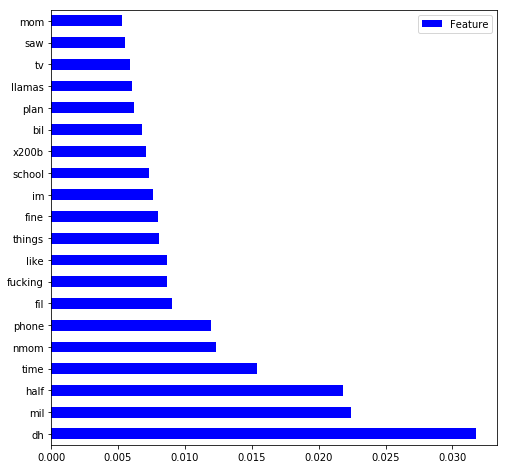

In [43]:
temp_df.iloc[:, ::-1].plot(kind='barh', figsize = (8,8), color= 'b')